In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# model imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# processing imports
from sklearn.preprocessing import LabelEncoder
from string import punctuation
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from termcolor import colored
nltk.download('stopwords')
stopwords.words("english")
nltk.download('punkt')
nltk.download('wordnet')

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from transformers import AutoTokenizer, TFAutoModel

from keras.layers import Dense, LSTM, MaxPool1D, Flatten, Dropout, Conv1D, Activation, Embedding, Input, Bidirectional, SimpleRNN, Reshape
from keras.models import Sequential, Model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# import pipeline and SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from warnings import filterwarnings
filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# read dataset
set1 = pd.read_csv('a.csv')
set2 = pd.read_csv('c.csv')
set3 = pd.read_csv('b.csv', encoding='utf-8', on_bad_lines='skip')

In [ ]:
set1 = set1.drop(columns=['Unnamed: 0'])
set1 = set1.rename(columns = {"Email Text" : "Text", "Email Type" : "label"})
set1['label'].replace({'Safe Email': 0, 'Phishing Email': 1}, inplace=True)
set1.astype({'label': 'int64'}).dtypes
set1.info()
set1.head(100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18650 entries, 0 to 18649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    18634 non-null  object
 1   label   18650 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 291.5+ KB


,Text,label
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",0
1,the other side of * galicismos * * galicismo *...,0
2,re : equistar deal tickets are you still avail...,0
3,\nHello I am your hot lil horny toy.\n I am...,1
4,software at incredibly low prices ( 86 % lower...,1
...,...,...
95,"enron / hpl actuals for june 6 , 2000 teco tap...",0
96,you ' ve been selected for the low rates progr...,1
97,A:link {TEX-DECORATION: none}A:active {TEXT-DE...,1
98,syntax of east asian languages workshop usc wo...,0


In [ ]:
set2["Text"] = set2["subject"] + " " + set2["body"]
set2 = set2.drop(columns=['sender', 'receiver', 'date', 'subject', 'body', 'urls'])
set2 = set2[['Text', 'label']]
set2.info()
set2.head(100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39154 entries, 0 to 39153
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    39126 non-null  object
 1   label   39154 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 611.9+ KB


,Text,label
0,"Never agree to be a loser Buck up, your troubl...",1
1,Befriend Jenna Jameson \nUpgrade your sex and ...,1
2,CNN.com Daily Top 10 >+=+=+=+=+=+=+=+=+=+=+=+=...,1
3,Re: svn commit: r619753 - in /spamassassin/tru...,0
4,SpecialPricesPharmMoreinfo \nWelcomeFastShippi...,1
...,...,...
95,Re: [Python-Dev] Python-Dev Summary Draft (Apr...,0
96,Re: [Python-Dev] Python-Dev Summary Draft (Apr...,0
97,[Perl Jobs] Top NYC LAMP shop / B2B mod_perl /...,0
98,[SM-USERS] SM 1.4.13 Configuration Question: M...,0


In [ ]:
set3["Text"] = set3["subject"] + " " + set3["body"]
set3 = set3.drop(columns=['sender', 'receiver', 'date', 'subject', 'body', 'urls'])
set3 = set3[['Text', 'label']]
set3.info()
set3.head(100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53757 entries, 0 to 53756
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    53308 non-null  object
 1   label   53757 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 840.1+ KB


,Text,label
0,"Generic Cialis, branded quality@ \n\n\n\n\n\n...",1
1,"Typo in /debian/README Hi, i've just updated f...",0
2,authentic viagra Mega authenticV I A G R A ...,1
3,"Nice talking with ya \nHey Billy, \n\nit was r...",1
4,or trembling; stomach cramps; trouble in sleep...,1
...,...,...
95,Do not miss this opportunity for recovery \n\n...,1
96,How does Cialis work? What is Cialis?\n\nCial...,1
97,variety of styles Spring watches models\nLuxu...,1
98,30 Free digital camera prints from Snapfish \n...,1


In [ ]:
frames = [set1, set3]
comb1 = pd.concat(frames)
comb1

,Text,label
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",0
1,the other side of * galicismos * * galicismo *...,0
2,re : equistar deal tickets are you still avail...,0
3,\nHello I am your hot lil horny toy.\n I am...,1
4,software at incredibly low prices ( 86 % lower...,1
...,...,...
53752,Job: just for you. \n\n\n\nWhile we may ...,1
53753,the reply for your request for a job place [le...,1
53754,"Re: [R] Me again, about the horrible documenta...",0
53755,"Re: [R] RODBC problem Hello,\n\nas I wrote I c...",0


In [ ]:
comb1.drop_duplicates(inplace = True)
set2.drop_duplicates(inplace = True)
print(colored("\nDUPLICATED VALUES WERE SUCCESFULLY DROPPED...", color = "green", attrs = ["bold", "dark"]))


DUPLICATED VALUES WERE SUCCESFULLY DROPPED...


[Text(0.5, 1.0, "Class (Phishing or Safe) frequencies of 'target' variable for training")]

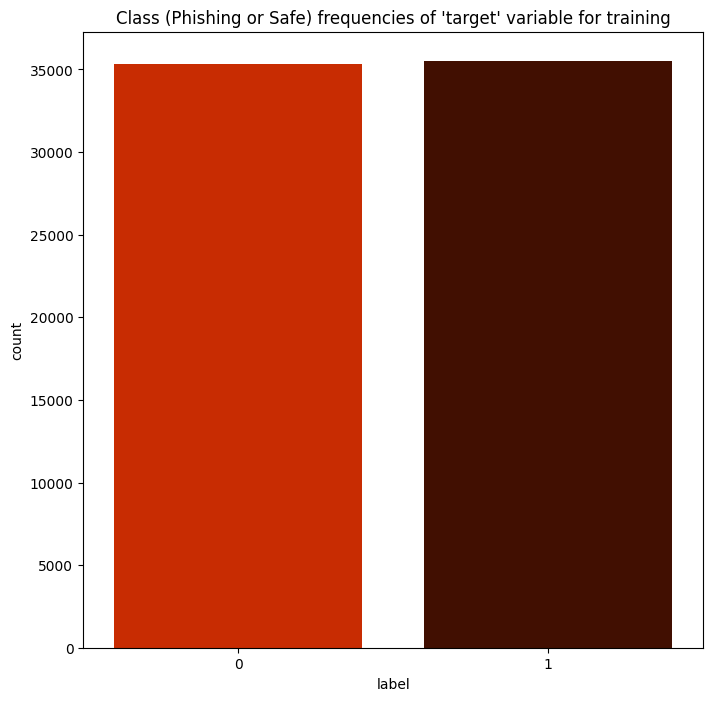

In [ ]:
plt.figure(figsize = [8, 8], clear = True, facecolor = "white")
sns.barplot(x = comb1["label"].value_counts().index,
y = comb1["label"].value_counts(), palette = ["#C82C02", "#410F01"],
saturation = 1).set(title = "Class (Phishing or Safe) frequencies of 'target' variable for training")

[Text(0.5, 1.0, "Class (Phishing or Safe) frequencies of 'target' variable for testing")]

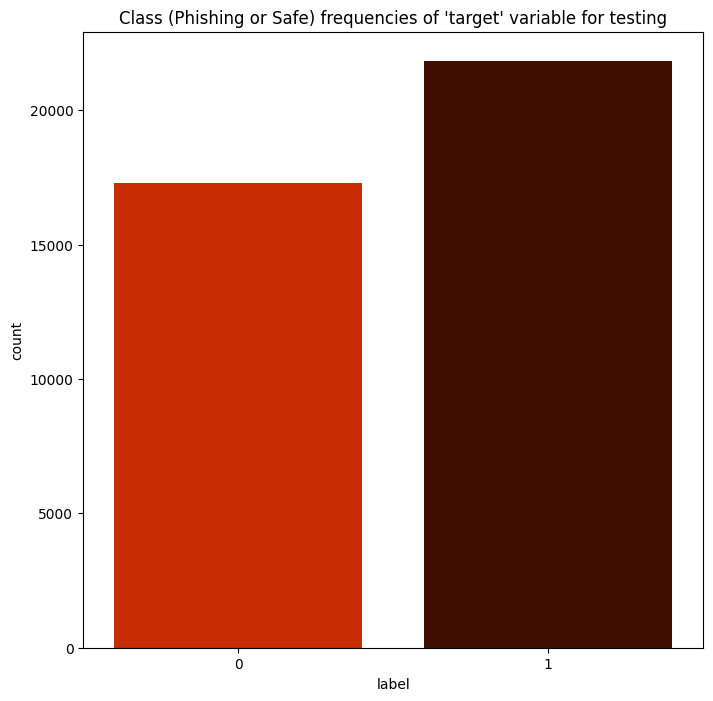

In [ ]:
plt.figure(figsize = [8, 8], clear = True, facecolor = "white")
sns.barplot(x = set2["label"].value_counts().index,
y = set2["label"].value_counts(), palette = ["#C82C02", "#410F01"],
saturation = 1).set(title = "Class (Phishing or Safe) frequencies of 'target' variable for testing")

In [ ]:
#pre-processes
def preprocess(Text):
    Text = re.sub(r'[^\w\s]', ' ', str(Text).lower()).strip()
    return Text

comb1['Text'] = comb1['Text'].apply(preprocess)
set2['Text'] = set2['Text'].apply(preprocess)
comb1["Text"] = comb1["Text"].str.replace('\d','')
set2["Text"] = set2["Text"].str.replace('\d','')
print(colored("\nNUMBERS AND PUNCTUATIONS WERE SUCCESFULLY DELETED...", color = "green", attrs = ["bold", "dark"]))


NUMBERS AND PUNCTUATIONS WERE SUCCESFULLY DELETED...


In [ ]:
# Split `comb1` into train and validation sets
train_texts, val_texts, train_labels, val_labels = train_test_split(
    comb1['Text'], comb1['label'], test_size=0.2, random_state=42
)

test_texts = set2['Text']
test_labels = set2['label']

# 1. Use ALBERT Tokenizer
tokenizer = AutoTokenizer.from_pretrained("albert-base-v2")

def tokenize_texts(texts, max_length=128):
    tokens = tokenizer(list(texts), truncation=True, padding=True, max_length=max_length, return_tensors="tf")
    return tokens['input_ids'], tokens['attention_mask']

# Tokenize datasets
X_train_ids, X_train_mask = tokenize_texts(train_texts)
X_val_ids, X_val_mask = tokenize_texts(val_texts)
X_test_ids, X_test_mask = tokenize_texts(test_texts)

# 2. Load ALBERT Model
albert_model = TFAutoModel.from_pretrained("albert-base-v2")

# 3. Extract ALBERT Embeddings with Batch Processing
def extract_albert_embeddings(input_ids, attention_mask, batch_size=32):
    embeddings = []
    dataset = tf.data.Dataset.from_tensor_slices((input_ids, attention_mask)).batch(batch_size)
    for batch_ids, batch_mask in dataset:
        outputs = albert_model(input_ids=batch_ids, attention_mask=batch_mask)
        embeddings.append(outputs.last_hidden_state[:, 0, :].numpy())  # Use [CLS] token
    return np.vstack(embeddings)

# Generate embeddings using ALBERT
X_train_bert = extract_albert_embeddings(X_train_ids, X_train_mask)
X_val_bert = extract_albert_embeddings(X_val_ids, X_val_mask)
X_test_bert = extract_albert_embeddings(X_test_ids, X_test_mask)


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/684 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/760k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/47.4M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFAlbertModel: ['predictions.dense.weight', 'predictions.decoder.bias', 'predictions.LayerNorm.weight', 'predictions.LayerNorm.bias', 'predictions.dense.bias', 'predictions.bias']
- This IS expected if you are initializing TFAlbertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFAlbertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFAlbertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFAlbertModel for predictions without further training.


In [ ]:
def ann():
    model = Sequential(name="ANN")
    model.add(Dense(128, activation='relu', input_shape=(768,)))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
def rnn():
    model = Sequential(name="RNN")
    model.add(Reshape((768, 1), input_shape=(768,)))
    model.add(SimpleRNN(128, activation='relu', return_sequences=True))
    model.add(Dropout(0.5))
    model.add(SimpleRNN(64, activation='relu', return_sequences=True))
    model.add(Dropout(0.5))
    model.add(SimpleRNN(32, activation='relu', return_sequences=False))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
def cnn():
    model = Sequential(name="CNN")
    model.add(Reshape((768, 1), input_shape=(768,)))
    model.add(Conv1D(128, kernel_size=3, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Conv1D(64, kernel_size=3, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
def ann_lstm():
    model = Sequential(name="ANN-LSTM")
    model.add(Dense(128, activation='relu', input_shape=(768,)))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Reshape((1, 64)))
    model.add(LSTM(32))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
def rnn_lstm():
    model = Sequential(name="RNN-LSTM")
    model.add(Reshape((768, 1), input_shape=(768,)))
    model.add(SimpleRNN(128, activation='relu', return_sequences=True))
    model.add(Dropout(0.5))
    model.add(SimpleRNN(64, activation='relu', return_sequences=True))
    model.add(Dropout(0.5))
    model.add(LSTM(32))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
def cnn_lstm():
    model = Sequential(name="CNN-LSTM")
    model.add(Reshape((768, 1), input_shape=(768,)))
    model.add(Conv1D(128, kernel_size=3, activation='relu'))
    model.add(Dropout(0.3))
    model.add(LSTM(64, return_sequences=True))
    model.add(Dropout(0.3))
    model.add(LSTM(32))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
def stacked_lstm():
    model = Sequential(name="Stacked_LSTM_Model")
    model.add(Reshape((768, 1), input_shape=(768,), name="reshape_input"))
    model.add(LSTM(128, activation='relu', return_sequences=True, name="lstm_layer_1"))
    model.add(Dropout(0.5, name="dropout_layer_1"))
    model.add(LSTM(64, activation='relu', return_sequences=True, name="lstm_layer_2"))
    model.add(Dropout(0.3, name="dropout_layer_2"))
    model.add(LSTM(32, activation='relu', name="lstm_layer_3"))
    model.add(Dropout(0.3, name="dropout_layer_3"))
    model.add(Dense(1, activation='sigmoid', name="output_layer"))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

models = {
    # 'ANN': ann(),
    # 'RNN': rnn(),
    # 'CNN': cnn(),
    # 'ANN-LSTM': ann_lstm(),
    'RNN-LSTM': rnn_lstm(),
    # 'CNN-LSTM': cnn_lstm(),
    # "Stacked_LSTM": stacked_lstm(),
}

In [ ]:
# Define function to evaluate the model
def evaluate_model(model, X_test, y_test):
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    print(classification_report(y_test, y_pred))

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train and evaluate models
for model_name, model in models.items():
    print(f"\nTraining {model_name} model...")

    # Fit the model and store the history object
    history = model.fit(
        X_train_bert, train_labels,
        epochs=30,
        batch_size=64,
        validation_data=(X_val_bert, val_labels),
        callbacks=[early_stopping],
        verbose=1
    )

    # Evaluate model
    print(f"Evaluating {model_name} model...")
    evaluate_model(model, X_test_bert, test_labels)

    # Calculate training accuracy
    train_score = model.evaluate(X_train_bert, train_labels, verbose=0)
    print("Training accuracy: {:.2f}%".format(train_score[1] * 100))



Training RNN-LSTM model...
Epoch 1/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 1468s 2s/step - accuracy: 0.7955 - loss: 0.4322 - val_accuracy: 0.8905 - val_loss: 0.2735
Epoch 2/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 1471s 2s/step - accuracy: 0.8994 - loss: 0.2602 - val_accuracy: 0.9191 - val_loss: 0.2173
Epoch 3/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 1500s 2s/step - accuracy: 0.9139 - loss: 0.2256 - val_accuracy: 0.9114 - val_loss: 0.2238
Epoch 4/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 1482s 2s/step - accuracy: 0.9177 - loss: 0.2129 - val_accuracy: 0.9209 - val_loss: 0.1991
Epoch 5/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 1526s 2s/step - accuracy: 0.9235 - loss: 0.2039 - val_accuracy: 0.9260 - val_loss: 0.1916
Epoch 6/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 1523s 2s/step - accuracy: 0.9249 - loss: 0.1966 - val_accuracy: 0.9265 - val_loss: 0.1932
Epoch 7/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 1514s 2s/step - accuracy: 0.9288 - loss: 0.1895 - val_accuracy: 0.9301 - val_loss: 0.1835
Epoch 8/30
886/886 ━━━━━━━━━━━━━━━━━━━━ 1517s 2s/step - accura

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Function to plot training and validation metrics
def plot_graphs(var1, var2, title, metrics):
    metrics[[var1, var2]].plot()
    plt.title(f'Model: Training and Validation {title}')
    plt.xlabel('Number of epochs')
    plt.ylabel(title)
    plt.legend([var1, var2])
    plt.show()

# Function to plot confusion matrix
def plot_confusion_matrix(cm, model_name):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    fig, ax = plt.subplots(figsize=(9, 7))
    disp.plot(ax=ax, cmap="viridis", colorbar=True)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()

# Loop through each model
for model_name, model in models.items():
    print(f"\nEvaluating {model_name} model...\n{'='*40}")

    # Convert history to DataFrame for further analysis
    metrics = pd.DataFrame(history.history)

    # Rename columns for better readability
    metrics.rename(columns={'loss': 'Training_Loss',
                            'accuracy': 'Training_Accuracy',
                            'val_loss': 'Validation_Loss',
                            'val_accuracy': 'Validation_Accuracy'}, inplace=True)

    # Plot loss graphs
    print(f"Plotting loss graphs for {model_name}")
    plot_graphs('Training_Loss', 'Validation_Loss', 'Loss', metrics)

    # Plot accuracy graphs
    print(f"Plotting accuracy graphs for {model_name}")
    plot_graphs('Training_Accuracy', 'Validation_Accuracy', 'Accuracy', metrics)

    # Predict and create confusion matrix
    y_pred = (model.predict(X_test_bert) > 0.5).astype(int)
    cm = confusion_matrix(test_labels, y_pred)

    # Plot confusion matrix
    print(f"Plotting confusion matrix for {model_name}")
    plot_confusion_matrix(cm, model_name)
